# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import numpy as np


training_file = 'traffic-signs-data/train.p'
validation_file = 'traffic-signs-data/valid.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']
#Added these to be able to plot some of this data once we are done with all the preprocessing
X_train_plot = X_train
y_train_plot = y_train

print()
print("Image Shape: {}".format(X_train[0].shape))
print()
print("Training Set:   {} samples".format(len(X_train)))
print("Validation Set: {} samples".format(len(X_valid)))
print("Test Set:       {} samples".format(len(X_test)))
print(y_train)


Image Shape: (32, 32, 3)

Training Set:   34799 samples
Validation Set: 4410 samples
Test Set:       12630 samples
[41 41 41 ... 25 25 25]


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
n_train = X_train.shape[0]
n_validation = X_valid.shape[0]
n_test = X_test.shape[0]
image_shape = X_train[0].shape
n_classes = np.max(y_train)+1

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)
print(y_train)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43
[41 41 41 ... 25 25 25]


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

## Visualization

### Data Distribution
To start with I just plotted a distribution of the data int eh dataset. This helped me visualize which calsses might have more representatives and which have lesser. Although at this point I still do not know what each class means. But I do get an understanding of if the data is lopsided and favours some calsses over the other. Even though in this data we can see that some calsses have significantly higher bin values compared to the others, I decided to move forward and see if this migth affect the final outcome. If it did I could always come back and work on data augmentation. But for now I decided to leave it as is.

In [3]:
import matplotlib.pyplot as plt

hist, bins = np.histogram(y_train, bins=43)
fig = plt.figure(figsize=(10,10))
#plt.fill_between(bins,, step="pre",figure = fig)
plt.bar((bins[1:] + bins[:-1]) * .5, hist, width=0.9*(bins[1] - bins[0]),align='center')
plt.title("Frequency diagram")
plt.xlabel("Label")
plt.ylabel("Frequency")
plt.style.use('ggplot')
plt.show()
#print(bins)

### Converting to Grayscale
Althought my intial analysis showed that in a traffic sign colour does matter. I had problems with the size of the dataset and also how much time it was taking to train and validate the model. 

I read a little bit about this dataset online and some of the documentation said that converting images to grayscale still maintains the content and thus decide to convert the images to grayscale

In [4]:
#Converting Image to Grayscale
X_train_rgb = X_train
print('Original:', X_train.shape)

X_train_gry = np.sum(X_train/3, axis=3, keepdims=True)

X_test_rgb = X_test
X_test_gry = np.sum(X_test/3, axis=3, keepdims=True)

X_valid_rgb = X_valid
X_valid_gry = np.sum(X_valid/3, axis=3, keepdims=True)

print('RGB shape:', X_train_rgb.shape)
print('Grayscale shape:', X_train_gry.shape)

Original: (34799, 32, 32, 3)
RGB shape: (34799, 32, 32, 3)
Grayscale shape: (34799, 32, 32, 1)


## Visualizing Grayscale
This was an idea I picked up from one fo the implementations online. This helped me Visualize how the grayscale images compared to the coloured images. This was also the first time I had actually seen the different signs  

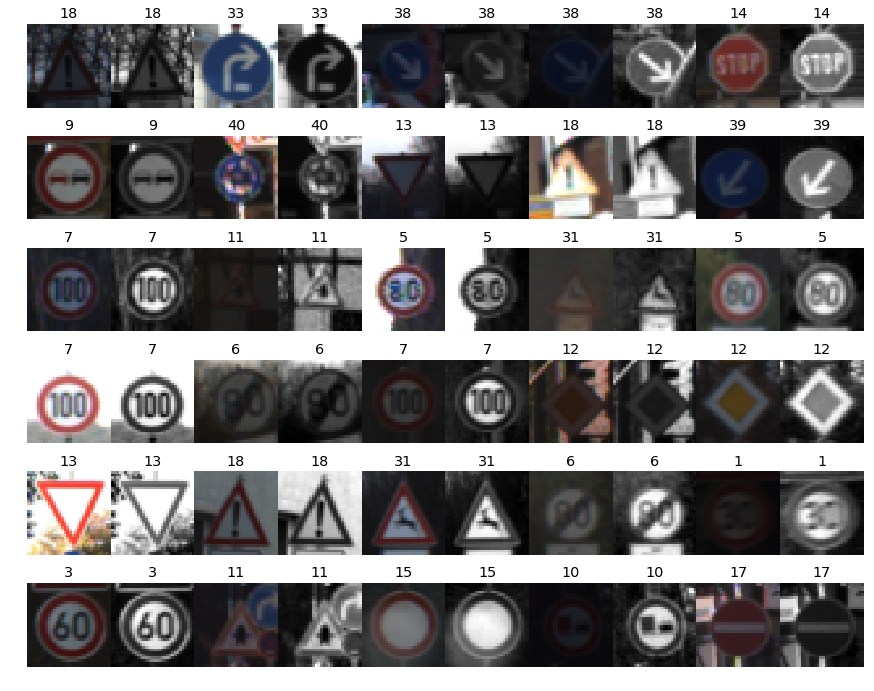

In [5]:
import random
fig, axs = plt.subplots(6,10, figsize=(15, 12))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()
for i in range(0,60,2):
    index = random.randint(0, len(X_train))
    image = X_train[index]
    #print(image.shape)
    axs[i].axis('off')
    axs[i].imshow(image)
    axs[i].set_title(y_train[index])
    image = X_train_gry[index].squeeze()
    axs[i+1].axis('off')
    axs[i+1].imshow(image,cmap='gray')
    axs[i+1].set_title(y_train[index])

## Dataset Visualization
Next I decided to visualize the complate dataset. This would help me identify the kinds of signs we have in the dataset

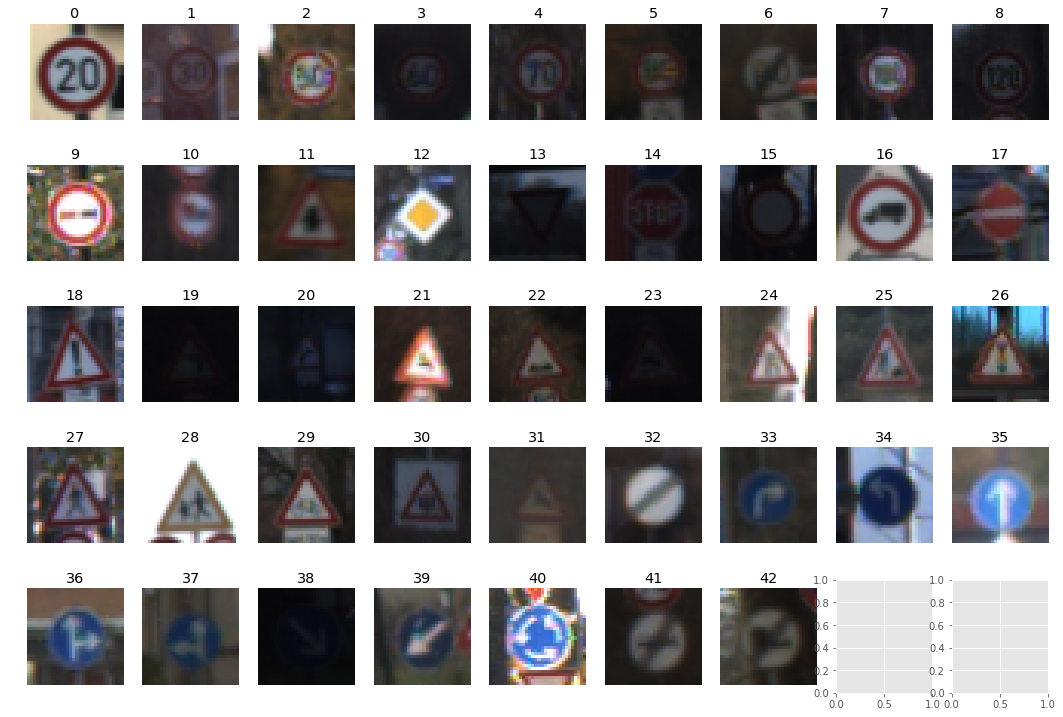

In [6]:
fig2, axs = plt.subplots(5,9, figsize=(15,10))
fig2.tight_layout()
fig2.subplots_adjust(hspace = .25,wspace=0.2)
axs = axs.ravel()
index = np.zeros((43,),dtype=int)
indextemp=0
count = np.zeros((43,),dtype=int)
flag=False
i=0
#print(y_train[0])
count_number_photos=0
while flag!=True:
    indextemp = int(y_train[i])
    #print(indextemp)
    if count[indextemp]<1:
        #print(count[indextemp])
        index[indextemp]=i
        count[indextemp]+=1
        i+=1
        count_number_photos+=1
        if count_number_photos==43:
            flag=True
        continue
    i+=1

#print(count.shape)
indextemp=10
indexcol=0
for i in range(43):
    indexi = index[i]
    image = X_train[indexi]
    #print(image.shape)
    axs[i].axis('off')
    axs[i].imshow(image)
    axs[i].set_title(y_train[indexi])
    #image = X_train_gry[indexi].squeeze()
    #axs[i+1].axis('off')
    #axs[i+1].imshow(image,cmap='gray')
    #axs[i+1].set_title(y_train[indexi])

In [7]:
X_train = X_train_gry
X_valid = X_valid_gry
X_test = X_test_gry
print('done')

done


## Histogram analysis
I did a histogram plot for all the three sets I had. Training Set, Validation set and the test set. I realized that we have a very similar distribution in terms of the number of signs per type that we have in all these sets.

Text(0,0.5,'Frequency')

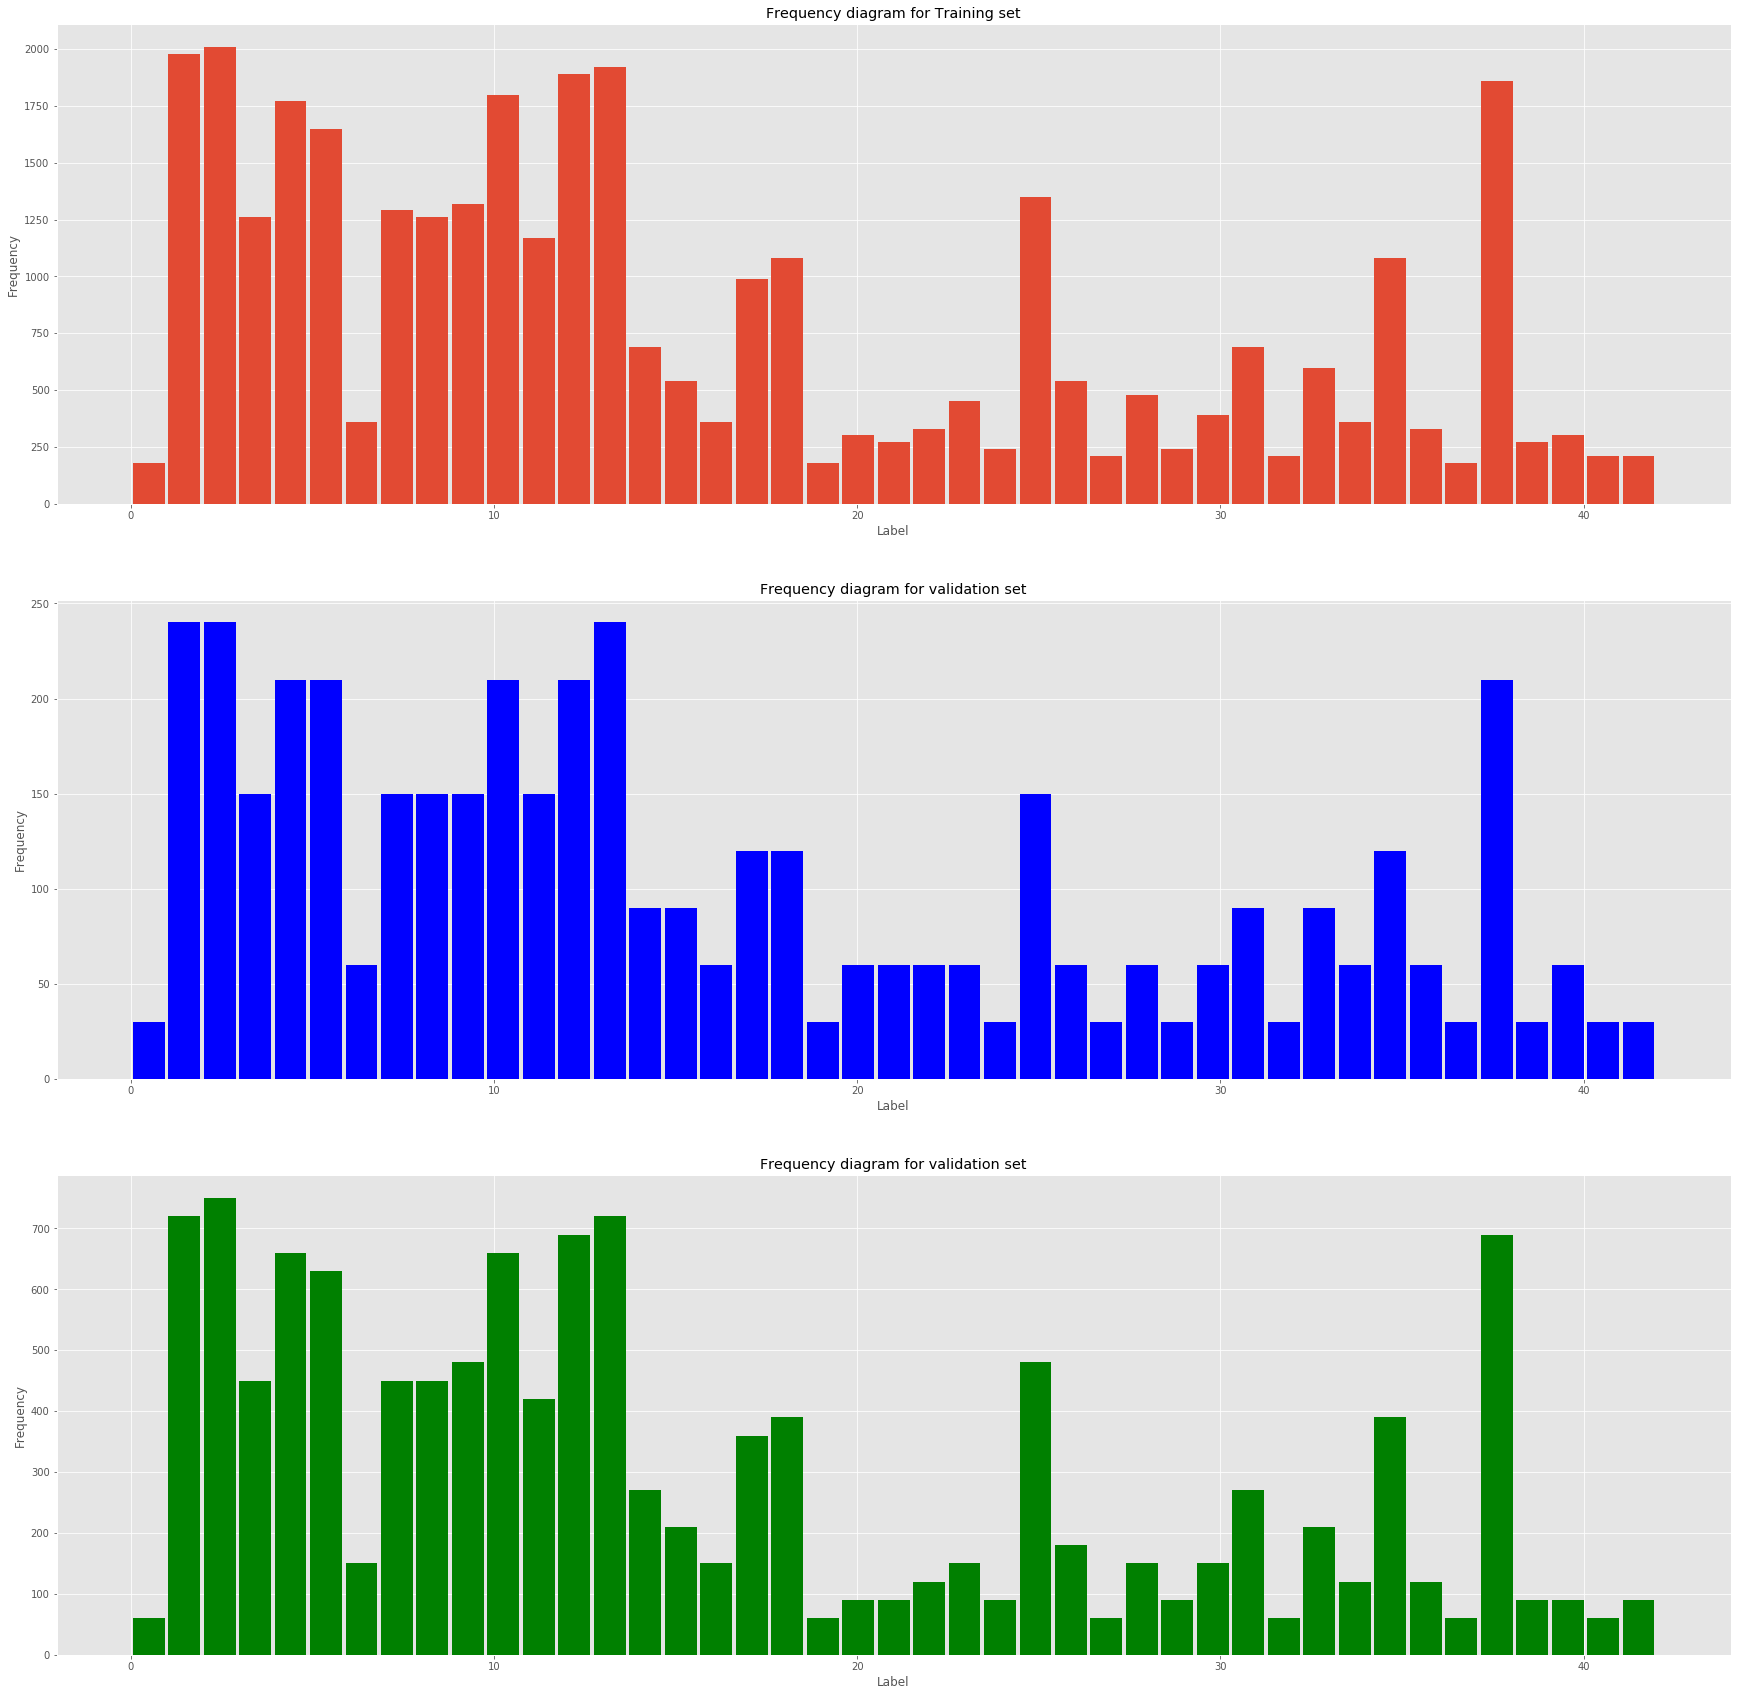

In [8]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3,1, figsize=(30, 30))
fig.subplots_adjust(hspace = .2, wspace=.2)
axs = axs.ravel()

hist, bins = np.histogram(y_train, bins=43)
#plt.fill_between(bins,, step="pre",figure = fig)
axs[0].bar((bins[1:] + bins[:-1]) * .5, hist, width=0.9*(bins[1] - bins[0]),align='center')
axs[0].set_title("Frequency diagram for Training set")
axs[0].set_xlabel("Label")
axs[0].set_ylabel("Frequency")
#axs[0].set_style.use('ggplot')
#axs[0].show()
#print(bins)
hist, bins = np.histogram(y_valid, bins=43)
#plt.fill_between(bins,, step="pre",figure = fig)
axs[1].bar((bins[1:] + bins[:-1]) * .5, hist, width=0.9*(bins[1] - bins[0]),align='center',color='blue')
axs[1].set_title("Frequency diagram for validation set")
axs[1].set_xlabel("Label")
axs[1].set_ylabel("Frequency")
#axs[0].set_style.use('ggplot')
#axs[0].show()
#print(bins)
hist, bins = np.histogram(y_test, bins=43)
#plt.fill_between(bins,, step="pre",figure = fig)
axs[2].bar((bins[1:] + bins[:-1]) * .5, hist, width=0.9*(bins[1] - bins[0]),align='center',color='green')
axs[2].set_title("Frequency diagram for validation set")
axs[2].set_xlabel("Label")
axs[2].set_ylabel("Frequency")
#axs[0].set_style.use('ggplot')
#axs[0].show()
#print(bins)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

## Preprocessing

I normalized the data using `((pixel)-mean)/(max-min)` This way the data was moved by the mean and also normalized from 0 - 1 at the same time. I found this to work slightly better in terms of the result obtained than the  `(pixel - 128)/ 128`

In [9]:
#checking mean of data

#Making Mean 0

X_train = np.float32(X_train)
X_valid = np.float32(X_valid)
X_test = np.float32(X_test)
mean = np.mean(X_train)
print(mean)

X_train_zeromean = (X_train - np.mean(X_train))/255
X_valid_zeromean = (X_valid - np.mean(X_valid))/255
X_test_zeromean = (X_test - np.mean(X_test))/255
print(np.mean(X_test_zeromean))

X_train=X_train_zeromean
X_valid=X_valid_zeromean
X_test=X_test_zeromean

82.67768
-8.471127e-10


In [10]:
def normalize(image_data,min,max):
    normal = []
    # TODO: Implement Min-Max scaling for grayscale image data
    b = 0.9
    a = 0.1
    Xmax = max
    Xmin = min
    normal = a + (((image_data-Xmin)*(b-a))/(Xmax - Xmin))
    return normal

#Test = np.float32(np.array([[[[1,2,3],[4,5,6],[7,8,9],[10,11,12]],[[1,2,3],[4,5,6],[7,8,9],[10,11,12]],[[1,2,3],[4,5,6],[7,8,9],[10,11,12]],[[1,2,3],[4,5,6],[7,8,9],[10,11,12]]]]))
#print(Test[0].shape)
#print(Test[0])
#Z = np.array([1,2,3,4])
#print(Z)
#Z = normalize(Z,1,4)
#print(Z)
#g = np.float32(Test[0]*0.5)
#Test[0] = np.float32(g)
#f = Test[0]*10
#f2 = g*10
#print(f)
#print(f2)
#print("test")
#print(Test[0])
#print(g)

X_train = np.float32(X_train)
X_valid = np.float32(X_valid)
X_test = np.float32(X_test)

#X_train=normalize(X_train,0,255)
#X_valid=normalize(X_valid,0,255)
#X_train=normalize(X_train,0,255)
print(X_valid.shape)

y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)
y_valid = y_valid.astype(np.float32)


(4410, 32, 32, 1)


I then Padded the image to use it as input for my model

In [11]:
import numpy as np

# Pad images with 0s
X_train      = np.pad(X_train, ((0,0),(1,1),(1,1),(0,0)), 'constant')
X_valid = np.pad(X_valid, ((0,0),(1,1),(1,1),(0,0)), 'constant')
X_test       = np.pad(X_test, ((0,0),(1,1),(1,1),(0,0)), 'constant')

print("Updated Image Shape: {}".format(X_test[0].shape))

Updated Image Shape: (34, 34, 1)


### Data set Shuffling
Data set is shuffled to try an drandomize the order in which the data goes into the model

In [12]:
from sklearn.utils import shuffle
X_train, y_train, X_train_rgb = shuffle(X_train, y_train, X_train_rgb)

### Hyper Paramters
2 of the Hyper parameters that were tuned are number of Epochs as well as the batch size

In [13]:
import tensorflow as tf

EPOCHS = 100
BATCH_SIZE = 128
print(X_train.shape)

/anaconda3/envs/IntroToTensorFlow/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


(34799, 34, 34, 1)


## Model Architecture

Multiple model architectures were tested after which I came to the final model architecture that was used. I am pasting a copy of a spread sheet to show teh different models used and also a graph that I used to determine the best model to be used. All this information is also in the model.xls file

`Review 2`

I will also use this Section to Describe the changes i made to the network and how it evolved.

1. I first began by using a variation of the lenet architecture we had used in the calssroom for digit recognition. I did this because this was probably the only starting point for me to go ahead from. 
2. At this point the network had no dropouts although I did use Pooling in the CNN.
3. I then realized I was able to learn the training set very fast and thus training accuracy was saturation to ~1 very quickly. 
4. I then tweaked my learnin rate parameters to decrese the speed at which I learned and thus might get a better validation accuracy.
5. I then also worked on decreasing the number of Epochs. This was mostly done because the data set was too large but later on I realized that lesser the number of epoch the closer my training and validation accuracy were. 
6. At this point I decided I had to complete 2 basic aspects of the project. first my model was currently not good enough to even reach an accuracy of close to 95% on the training Set. Secondly I was beginning to see signs of overfitting in the data that I was getting. 
7. I then began to tweak the model to make sure I could atleast learn the training parameters properly. 
8. At this point I introduced image preprocessing and realized the model was able to learn the training set very well. And at the same time I was also able to see a higher accuracy on the validation set.
9. Now to counter overfitting I introduced dropouts in my flat layer.
10. I began by introducing it almost after every layer. I then realized this was making me loose too much information and thus had to kee removing them until I reached the final netwrok architecture. 
11. After this It was just a matter of increassing my accuracy on the validation set. I realized that using smaller filters on the convolution network helped the model elarn different features. 
12. Also pooling after evenry CNN also made me lose a lot of data and decreased my accuracy a lot. Once I made these cahnges I was able to easily go ahead and train the model to get the desired accuracy. 

The excel file shown below shows the different model architectures used and also show the accuracy i was able to achieve. This helped me ultimately understand how tweaking certain parameters or adding layers helped affect my result.

At various points in this process when I was stuck and out of idea, I did ask my brother for help and also the ever trustworth google.


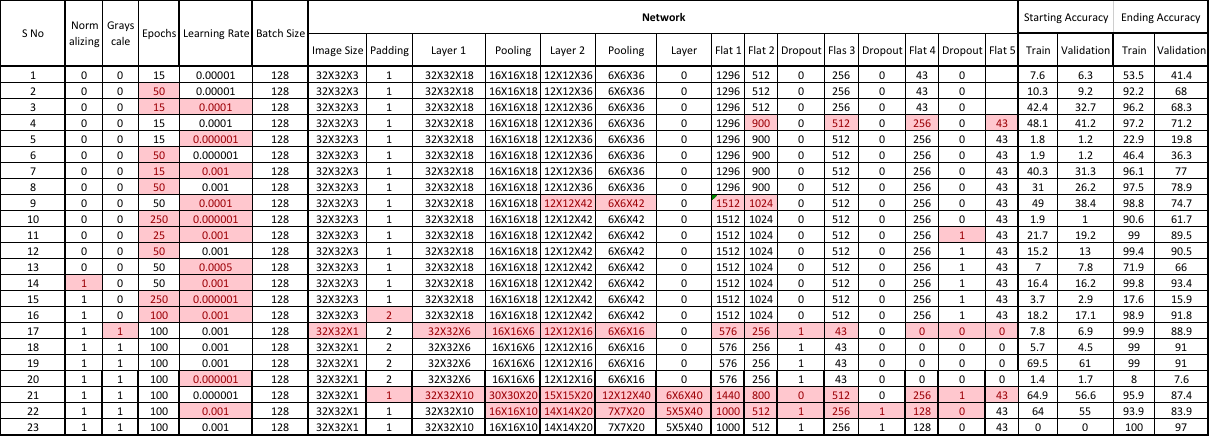

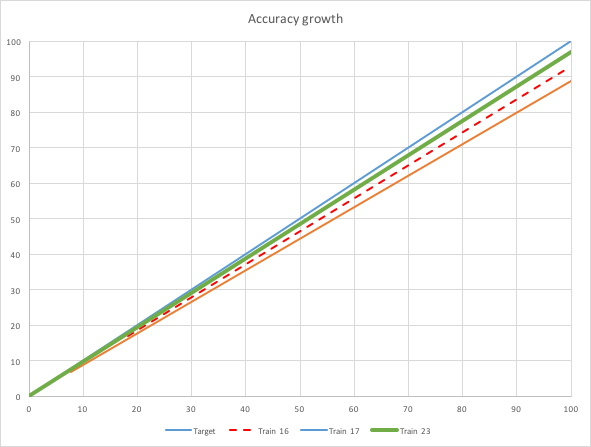

Accumulated growth for all 23 models was plotted adn analysed and ultimately the gree line was selected to be model to use
The green line in the above graph was selected. 


The Final model Archticture is as follows:
1. Input Image of 32X32X1
2. Pad the image to 34X34X1
3. Use a 3X3 CNN Filter with a depth of 10 - output is 32X32X10 - relu and Max pool - 16X16X10
4. Use a 3X3 CNN Filter with a depth of 20 - output is 14X14X20 - relu and Max pool - 7X7X20
5. Use a 3X3 CNN Filter with a depth of 40 - output is 5X5X40
6. Flatten - 1000
7. 1000 - 512 - Relu and Dropout
8. 512 - 256 - Relu and Dropout
9. 256 - 128 - Relu
10. 128 - 43 (Output Labels)
11. Convert to Softmax and optimize



In [14]:
from tensorflow.contrib.layers import flatten

def LeNet(x,keep_prob):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # TODO: Layer 1: Convolutional. Input = 34x34x1. Output = 32x32x10.
    c1w = tf.Variable(tf.truncated_normal(shape = (3,3,1,10),mean = mu, stddev = sigma))
    c1b = tf.Variable(tf.zeros(10))
    c1 = tf.nn.conv2d(x,c1w,strides=[1,1,1,1],padding = 'VALID')+c1b
    
    # TODO: Activation.
    c1 = tf.nn.relu(c1)

    # TODO: Pooling. Input = 32x32x10. Output = 16x16x10.
    c1 = tf.nn.max_pool(c1,ksize=[1,2,2,1],strides = [1,2,2,1],padding= 'VALID')

    # TODO: Layer 2: Convolutional. Output = 14x14x20.
    c2w = tf.Variable(tf.truncated_normal(shape = (3,3,10,20),mean = mu, stddev = sigma))
    c2b = tf.Variable(tf.zeros(20))
    c2 = tf.nn.conv2d(c1,c2w,strides=[1,1,1,1],padding = 'VALID') + c2b
    
    # TODO: Activation.
    c2 = tf.nn.relu(c2)

    # TODO: Pooling. Input = 14x14x20. Output = 7x7x20.
    c2 = tf.nn.max_pool(c2,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')
    
    # TODO: Layer 2: Convolutional. Output = 5x5x40.
    c3w = tf.Variable(tf.truncated_normal(shape = (3,3,20,40),mean = mu, stddev = sigma))
    c3b = tf.Variable(tf.zeros(40))
    c3 = tf.nn.conv2d(c2,c3w,strides=[1,1,1,1],padding = 'VALID') + c3b
    
    # TODO: Activation.
    #c3 = tf.nn.relu(c3)

    ## TODO: Pooling. Input = 5x5x40. Output = 6x6x40.
    #c3 = tf.nn.max_pool(c3,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')
    
    # TODO: Flatten. Input = 5x5x40. Output = 1000.
    f = flatten(c3)
    
    # TODO: Layer 2: Fully Connected. Input = 1000. Output = 512.
    f3w = tf.Variable(tf.truncated_normal(shape=(1000,512),mean = mu,stddev = sigma))
    f3b = tf.Variable(tf.zeros(512))
    f3 = tf.matmul(f,f3w)+f3b
    # TODO: Activation.
    f3 = tf.nn.relu(f3)
    f3 = tf.nn.dropout(f3, keep_prob)

    # TODO: Layer 3: Fully Connected. Input = 512. Output = 256.
    f4w = tf.Variable(tf.truncated_normal(shape=(512,256),mean = mu,stddev = sigma))
    f4b = tf.Variable(tf.zeros(256))
    f4 = tf.matmul(f3,f4w)+f4b
    # TODO: Activation.
    f4 = tf.nn.relu(f4)
    f4 = tf.nn.dropout(f4, keep_prob)
                      
    # TODO: Layer 4: Fully Connected. Input = 256. Output = 128.
    f5w = tf.Variable(tf.truncated_normal(shape=(256,128),mean = mu,stddev = sigma))
    f5b = tf.Variable(tf.zeros(128))
    f5 = tf.matmul(f4,f5w)+f5b
    # TODO: Activation.
    
    f5 = tf.nn.relu(f5)
    #f5 = tf.nn.dropout(f5, keep_prob)
                      
    # TODO: Layer 5: Fully Connected. Input = 128. Output = 43.
    f6w = tf.Variable(tf.truncated_normal(shape=(128,43),mean = mu,stddev = sigma))
    f6b = tf.Variable(tf.zeros(43))
    f6 = tf.matmul(f5,f6w)+f6b
                      
    return f6

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [15]:
x = tf.placeholder(tf.float32, (None, 34, 34, 1))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32) 
one_hot_y = tf.one_hot(y, 43)
#print(y_valid.shape)


## Hyperparameters

Three major Hyper parameters were tuned
1. Epoch - 100
2. Learning rate - 0.001
3. Batch Size - 128

A detailed analysis of the ones used and the results are provided in the model.xls file

An Adam optimizer was used to otimize the result and update the weights.

In [16]:
rate = 0.001

logits = LeNet(x,keep_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [17]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data, prob,sess):
    num_examples = len(X_data)
    total_accuracy = 0
    #sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: prob})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples
print(X_train.shape)
print(X_valid.shape)

(34799, 34, 34, 1)
(4410, 34, 34, 1)


## Model is trained

In [19]:
from time import time
sess = tf.Session()
sess.run(tf.global_variables_initializer())
num_examples = len(X_train)

print("Training...")
print()
for i in range(EPOCHS):
    start = time()
    X_train, y_train = shuffle(X_train, y_train)
    for offset in range(0, num_examples, BATCH_SIZE):
        end = offset + BATCH_SIZE
        batch_x, batch_y = X_train[offset:end], y_train[offset:end]
        sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})

    training_accuracy = evaluate(X_train, y_train, 1,sess)
    print("EPOCH {} ...".format(i+1))
    print("Training Accuracy = {:.3f}".format(training_accuracy))

    validation_accuracy = evaluate(X_valid, y_valid, 1,sess)
    print("Validation Accuracy = {:.3f}".format(validation_accuracy))

    print()
    print('Time for Epoch:', time()-start)

saver.save(sess, './Lenet/model.ckpt')
print("Model saved")

Training...

EPOCH 1 ...
Training Accuracy = 0.880
Validation Accuracy = 0.836

Time for Epoch: 24.421742916107178
EPOCH 2 ...
Training Accuracy = 0.967
Validation Accuracy = 0.917

Time for Epoch: 25.960264205932617
EPOCH 3 ...
Training Accuracy = 0.983
Validation Accuracy = 0.938

Time for Epoch: 26.74788212776184
EPOCH 4 ...
Training Accuracy = 0.988
Validation Accuracy = 0.954

Time for Epoch: 26.304254055023193
EPOCH 5 ...
Training Accuracy = 0.992
Validation Accuracy = 0.950

Time for Epoch: 26.320228815078735
EPOCH 6 ...
Training Accuracy = 0.994
Validation Accuracy = 0.950

Time for Epoch: 26.34305691719055
EPOCH 7 ...
Training Accuracy = 0.996
Validation Accuracy = 0.958

Time for Epoch: 26.1186580657959
EPOCH 8 ...
Training Accuracy = 0.996
Validation Accuracy = 0.957

Time for Epoch: 26.096712112426758
EPOCH 9 ...
Training Accuracy = 0.997
Validation Accuracy = 0.961

Time for Epoch: 25.971058130264282
EPOCH 10 ...
Training Accuracy = 0.997
Validation Accuracy = 0.956

Time 

EPOCH 81 ...
Training Accuracy = 1.000
Validation Accuracy = 0.978

Time for Epoch: 25.642657995224
EPOCH 82 ...
Training Accuracy = 1.000
Validation Accuracy = 0.980

Time for Epoch: 27.506883144378662
EPOCH 83 ...
Training Accuracy = 1.000
Validation Accuracy = 0.976

Time for Epoch: 25.579565048217773
EPOCH 84 ...
Training Accuracy = 1.000
Validation Accuracy = 0.981

Time for Epoch: 26.047658920288086
EPOCH 85 ...
Training Accuracy = 1.000
Validation Accuracy = 0.981

Time for Epoch: 25.674696922302246
EPOCH 86 ...
Training Accuracy = 1.000
Validation Accuracy = 0.973

Time for Epoch: 26.12927794456482
EPOCH 87 ...
Training Accuracy = 1.000
Validation Accuracy = 0.975

Time for Epoch: 25.709946870803833
EPOCH 88 ...
Training Accuracy = 1.000
Validation Accuracy = 0.975

Time for Epoch: 26.30145287513733
EPOCH 89 ...
Training Accuracy = 1.000
Validation Accuracy = 0.975

Time for Epoch: 25.702368021011353
EPOCH 90 ...
Training Accuracy = 1.000
Validation Accuracy = 0.976

Time for E

In [76]:
#Accuracy without Restoring the model
sess = tf.Session()
sess.run(tf.global_variables_initializer())
test_accuracy = evaluate(X_test, y_test, 1,sess)
validation_accuracy = evaluate(X_valid, y_valid, 1,sess)
print("Validation Accuracy = {:.3f}".format(validation_accuracy))
print("Test Accuracy = {:.3f}".format(test_accuracy))

Validation Accuracy = 0.019
Test Accuracy = 0.011


In [77]:
#Accurace after restoring the model
saver.restore(sess, './Lenet/model.ckpt')
print('Model Restored')
test_accuracy = evaluate(X_test, y_test, 1,sess)
validation_accuracy = evaluate(X_valid, y_valid, 1,sess)
print("Validation Accuracy = {:.3f}".format(validation_accuracy))
print("Test Accuracy = {:.3f}".format(test_accuracy))



Model Restored
Validation Accuracy = 0.969
Test Accuracy = 0.957


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Downloaded Images

The following steps were followed to test the model on five images from the internet
1. 5 Images were downloaded and passed through the model.
2. Model predictions were noted and accuracy was calculated for the 5 images
3. The five images were visualed with the correct and rpedicted labels
4. Also the top 5 softmax probabilities recorded by the model were show and the corresponding images as well. 



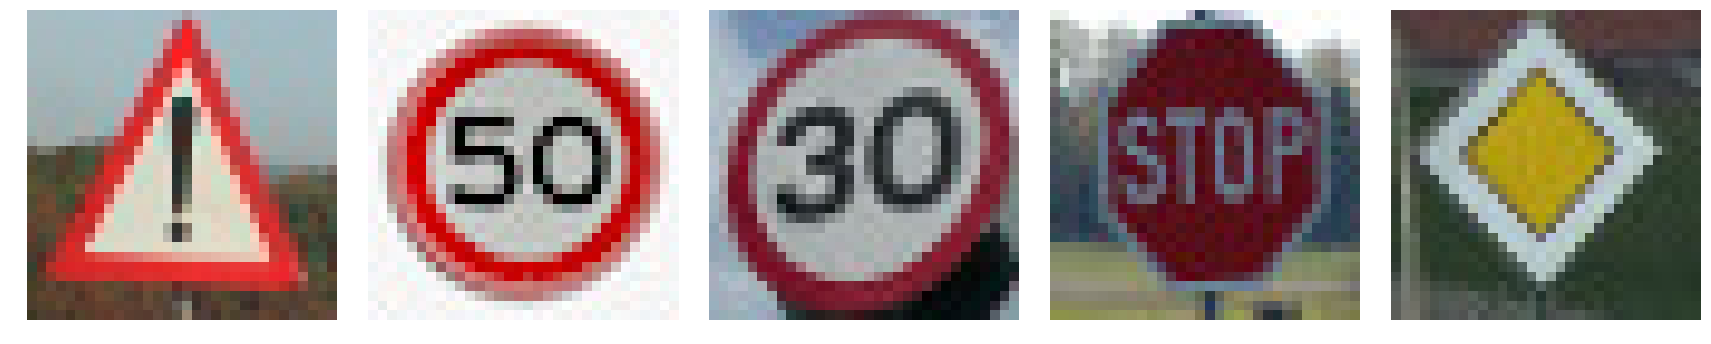

In [78]:
import numpy as np
import cv2

# print(X_valid.shape)

#input Images
labels = np.zeros((5,))

img = np.zeros((5,32,32,3))
labels = np.zeros((5,))

labels[0]=18
img[0] = cv2.imread('Test/exc.jpg')
b,g,r = cv2.split(img[0])      
img[0] = cv2.merge([r,g,b])


labels[1]=2
img[1] = cv2.imread('Test/50mph.jpg')
b,g,r = cv2.split(img[1])      
img[1] = cv2.merge([r,g,b])

labels[2]=1
img[2] = cv2.imread('Test/30km.jpg')
b,g,r = cv2.split(img[2])      
img[2] = cv2.merge([r,g,b])

labels[3]=14
img[3] = cv2.imread('Test/stop.jpg')
b,g,r = cv2.split(img[3])      
img[3] = cv2.merge([r,g,b])

labels[4]=12
img[4] = cv2.imread('Test/priro2.jpeg')
b,g,r = cv2.split(img[4])      
img[4] = cv2.merge([r,g,b])

fig, axs = plt.subplots(1,5, figsize=(30, 24))
fig.subplots_adjust(hspace = .2, wspace=0.1)
axs = axs.ravel()
index_subplot=0

for i in range(5):
    outimg = img[i]
    #print(outimg.shape)
    axs[index_subplot].axis('off')
    axs[index_subplot].imshow(outimg/255)
    index_subplot+=1

`Review 2`

## Downloaded images

I chose the above 5 pictures. 
1. Warning road Sign - The first sign was chosen because it was one of the few ones I could recognize immediately. 
2. 30 and 50 kmph limit signs - The second and third one were chosen to try and see if not only the shape size and colour but also if the digits are able to confure the model. 
3. Priority Road - I chose the Last picture because it was one of the few with a very different shape. Also in terms of distinct features apart from the shape this sign does not really have any other features. No writing or signs on it and also not a very bright combination of colours. 
4. Stop Sign - The STOP sign was chosen because it is one of the most recognizable signs and was probably one of the first searches that came up when I looked for traffic sign classifier signs. It is also intereesting as one of the signs that has a lot of verbage on it. This could be a good thing as it could be distinctive but could also be a difficult quality for the model to recognize.

In [82]:
#Preprocessing Image
#Grayscale
imagegry = np.sum(img/3, axis=3, keepdims=True)
#Padding
imagegrypad = np.pad(imagegry, ((0,0),(1,1),(1,1),(0,0)), 'constant')
#Meancentering
imagefloat = np.float32(imagegrypad)
imagemeanzero = (imagefloat - mean)/255

image=imagemeanzero

#Running classifier on image
accuracy = evaluate(image, labels, 1,sess)

softmax_probs = tf.nn.softmax(logits)
answer,soft_probs = sess.run([logits,softmax_probs],feed_dict={x:image,keep_prob:1})



### Predict the Sign Type for Each Image

Testing on 5 images.....
Accuracy: 0.6000000238418579


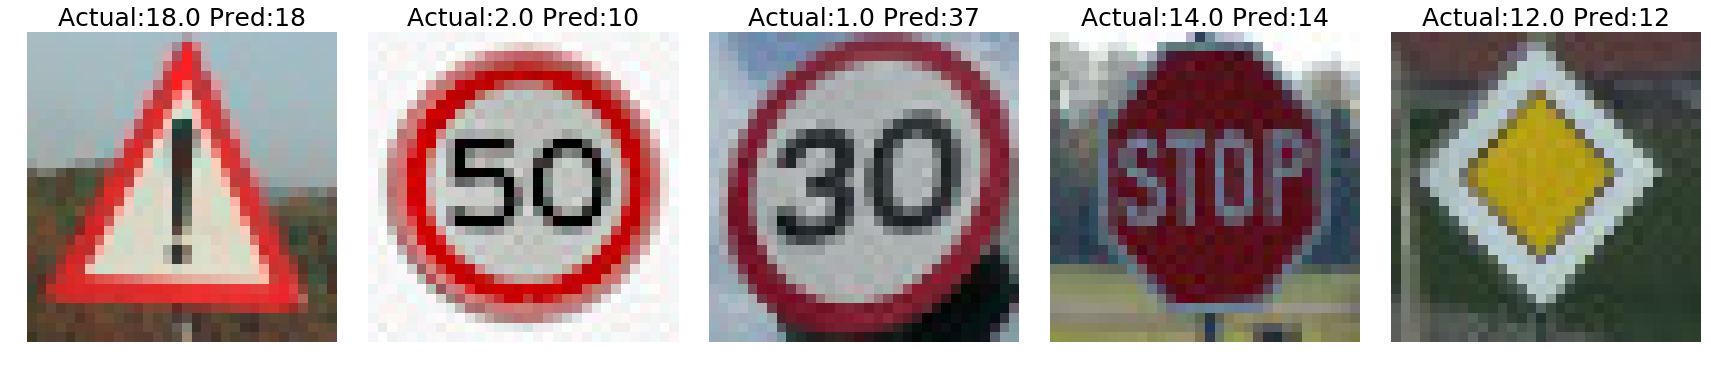

In [83]:
print("Testing on 5 images.....")
print("Accuracy:",accuracy)


fig, axs = plt.subplots(1,5, figsize=(30, 24))
fig.subplots_adjust(hspace = .2, wspace=0.1)
axs = axs.ravel()
index_subplot=0

for i in range(5):
    outimg = img[i]
    #print(outimg.shape)
    axs[index_subplot].axis('off')
    axs[index_subplot].imshow(outimg/255)
    stri = "Actual:"+str(labels[i])+" Pred:"+str(np.argmax(answer[i]))
    axs[index_subplot].set_title(stri,fontsize = 25)
    index_subplot+=1

Top 5 softmax probabilities....


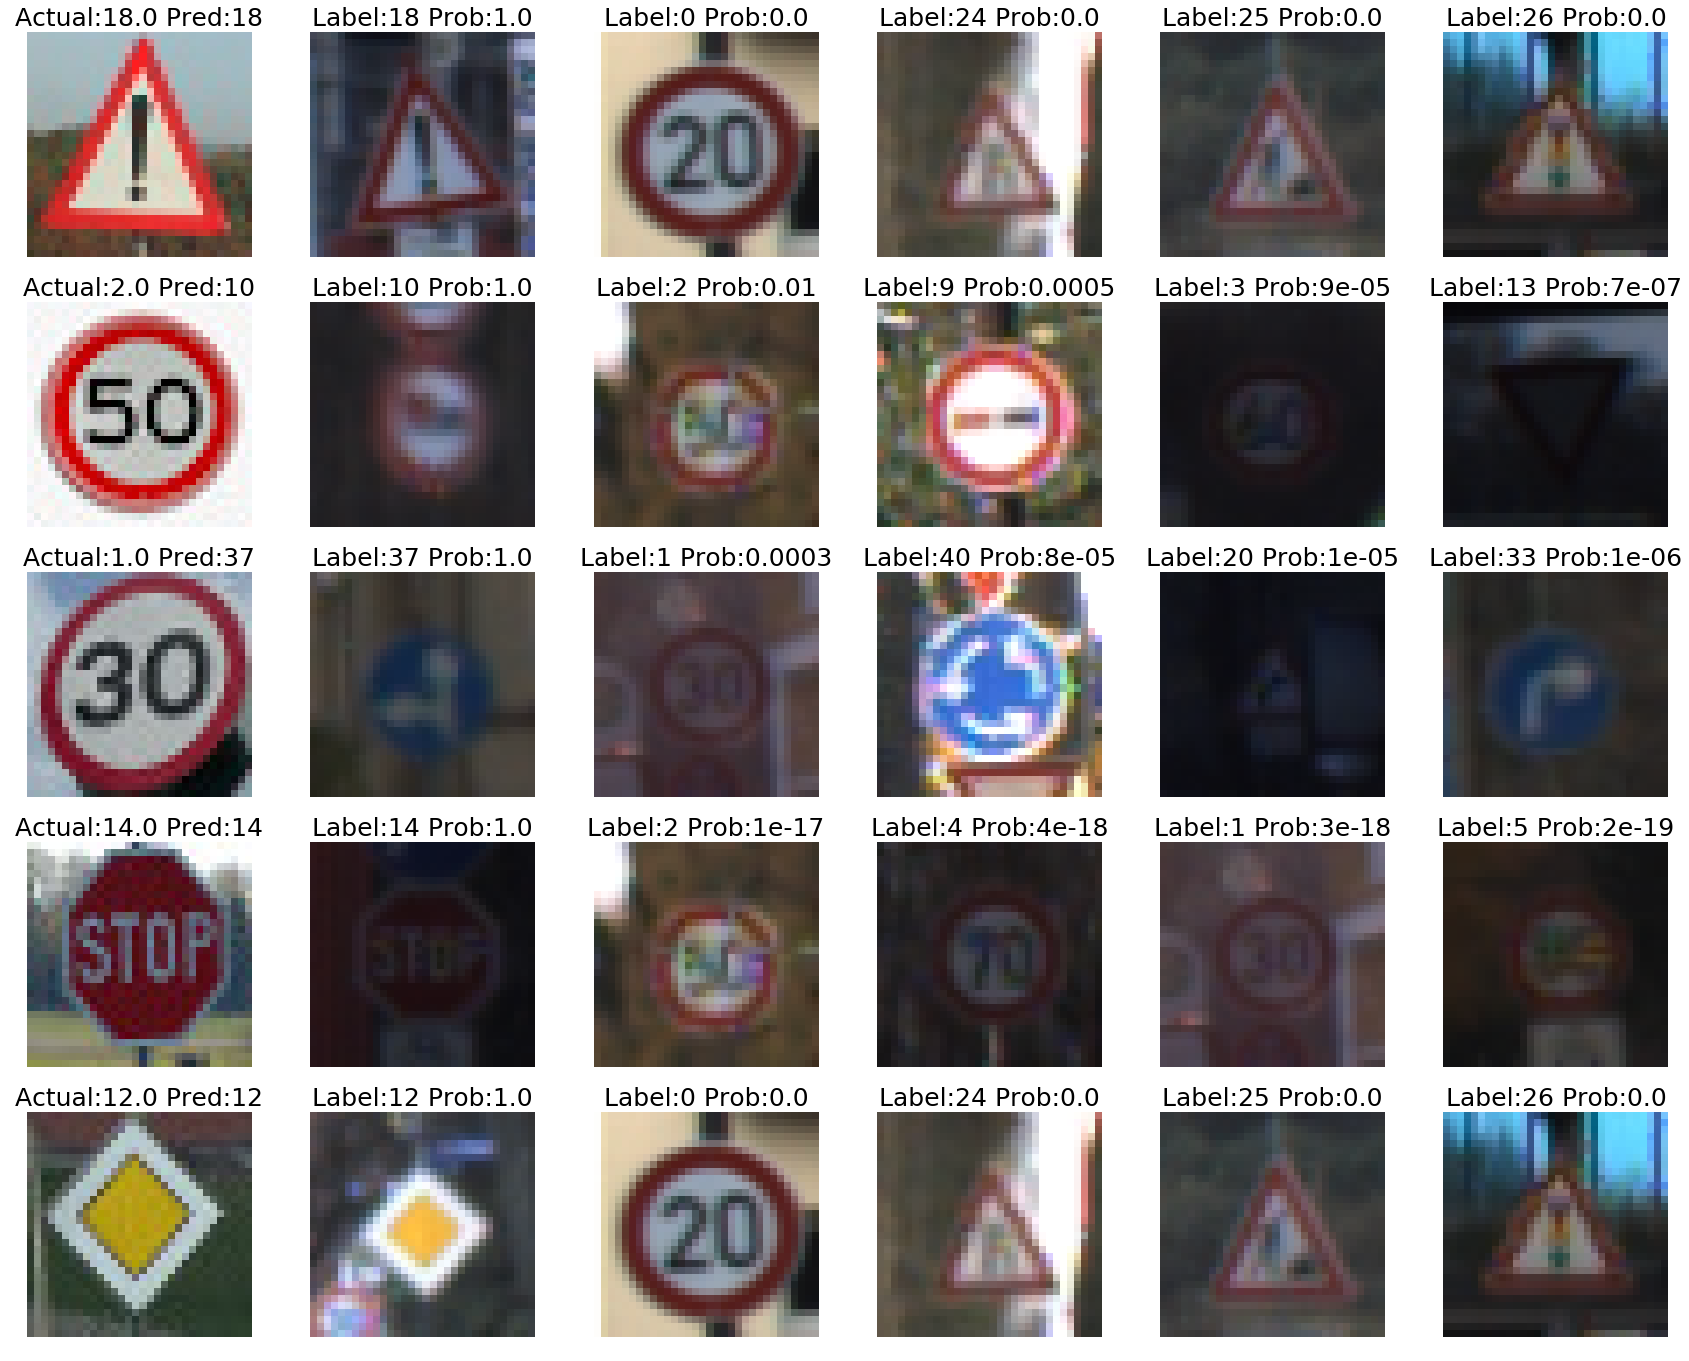

In [84]:
#Finding the top 5 probablities and seeing the closest tot eh actual image
ind = np.zeros((5,43),dtype=int)

from math import log10, floor

def round_to_1(x):
    return round(x, -int(floor(log10(abs(x)))))


for i in range(5):
    ind[i] = np.argsort(-1*soft_probs[i])

print("Top 5 softmax probabilities....")

fig, axs = plt.subplots(5,6, figsize=(30, 24))
fig.subplots_adjust(hspace = .2, wspace=0.1)
axs = axs.ravel()
index_subplot=0

#print(imagenew.shape)
for i in range(5):
    for j in range(6):
        if(j==0):
            outimg = img[i]
            #print(outimg.shape)
            axs[index_subplot].axis('off')
            axs[index_subplot].imshow(outimg/255)
            stri = "Actual:"+str(labels[i])+" Pred:"+str(np.argmax(answer[i]))
            axs[index_subplot].set_title(stri,fontsize = 25)
            index_subplot+=1
            continue
        for k in range(len(y_train_plot)):
            if ind[i,j-1] == y_train_plot[k]:
                #print(ind[i,j-1])
                #print(y_train[k])
                #print('k =',k)
                index = k
                break
        outimg = X_train_plot[index]
        axs[index_subplot].axis('off')
        axs[index_subplot].imshow(outimg)
        stri = "Label:"+str(ind[i,j-1])+" Prob:"+str(float('%.1g' % soft_probs[i,ind[i,j-1]]))
        axs[index_subplot].set_title(stri,fontsize = 25)
        index_subplot+=1